# Introduction to Recurrent Neural Networks

## What are Recurrent Neural Networks (RNN)?

Up until then, we've been talking about neural networks working on isolated instances, sequence-wise.

What if we wanted neural networks that can understand sequences, such as time, text, and videos?

This is where __Recurrent Neural Networks (RNN)__ come in.


You can think of the traditional neural network that we know, and then add loops!

<img src="figs/RNN-rolled.png" alt="Drawing" style="width: 100px;"/>

__Wait, how does that work?__

If you're familiar with dynamic systems, RNNs draw from the same concept.

$ y_t = f(y_{t-1}, \theta) $

This equation simply means that outputs from the previous sequence is incorporated as a feature for the next prediction.

Graphically, it looks like:


<img src="figs/RNN-unrolled.png" alt="Drawing" style="width: 600px;"/>


And what's great with RNNs is that these work even with an arbitrary length of sequences!

As such, RNNs can also be configured to work with __a lot of configurations__.


<img src="figs/rnn_diags.jpeg" alt="Drawing" style="width: 600px;"/>


## The Problem of Long Term Dependencies and the LSTM

The main problem of modeling dynamical systems is that inputs that are far away from the current input, tends to get lost. 

<img src="figs/RNN-longtermdependencies.png" alt="Drawing" style="width: 600px;"/>

Thus, a special kind of cell, called the Long Short Term Memory (LSTM) cell, was made to address this.

<img src="figs/lstm.png" alt="Drawing" style="width: 300px;"/>

You can actually think of the LSTM cell as being its own "mini" neural network, complete with its own sets of weights and biases:

<img src="figs/lstm_eq.png" alt="Drawing" style="width: 600px;"/>

What's interesting to note is that it has three "interleaved" layers or gates, namely:

1. Input gate
2. Forget gate
3. Output gate

More recently, improvements to the LSTM have been made, which resulted to the Gated Recurrent Unit (GRU).

## RNNs for Sequence Generation

From the past discussions we had, we ussed neural networks for supervised classification.

You've probably seen recurrent neural networks generate "art", from images to even prose and poetry. 

Let's try it out and create our own RNN that reads from the Book of Genesis.

The following example is based from [Keras](https://github.com/fchollet/keras/tree/master/examples)



In [1]:
%pylab inline
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM, Embedding
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import random
import sys

In [3]:
import pandas as pd

In [4]:
path = 'Genesis_KJV.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

corpus length: 199294
total chars: 51
nb sequences: 66418
Vectorization...


In [16]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


In [17]:
# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(256, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model...


In [18]:
# train the model, output generated text after each iteration
for iteration in range(1, 10):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X, y,
              batch_size=128, nb_epoch=1)


--------------------------------------------------
Iteration 1
Epoch 1/1
66418/66418 [==============================] - 16s - loss: 2.1386    

--------------------------------------------------
Iteration 2
Epoch 1/1
66418/66418 [==============================] - 16s - loss: 1.4954    

--------------------------------------------------
Iteration 3
Epoch 1/1
66418/66418 [==============================] - 16s - loss: 1.3141    

--------------------------------------------------
Iteration 4
Epoch 1/1
66418/66418 [==============================] - 16s - loss: 1.2009    

--------------------------------------------------
Iteration 5
Epoch 1/1
66418/66418 [==============================] - 16s - loss: 1.1169    - ETA: 0s 

--------------------------------------------------
Iteration 6
Epoch 1/1
66418/66418 [==============================] - 16s - loss: 1.1774    

--------------------------------------------------
Iteration 7
Epoch 1/1
66418/66418 [==============================] - 16s -

In [20]:
start_index = random.randint(0, len(text) - maxlen - 1)

for diversity in [0.1, 0.25, 0.5]:
    print()
    print('----- diversity:', diversity)

    generated = ''
    sentence = text[start_index: start_index + maxlen]
    generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)
    
    for i in range(400):
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x[0, t, char_indices[char]] = 1.

        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = indices_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
print()


----- diversity: 0.1
----- Generating with seed: "brother is dead, and he alone is left. i"
brother is dead, and he alone is left. it will i shall be the firstborn, who shall be over the flock.
[19:14] and said to his brothers, "what i have do not be abraming for the flock.
[19:14] and the lord has serent there whose the lord has ot the land of egypt and the lord has other sons and daughters.
[10:16] then he said, "i am the land of egypt the camels and the waters of the land of egypt and the lord has other sons and daughters.

----- diversity: 0.25
----- Generating with seed: "brother is dead, and he alone is left. i"
brother is dead, and he alone is left. it was set them the lord has other sons and toward the camels of the wilderness years; and he said, "i am the land of egypt and the place and the lord all the wred of the land of egypt.
[41:4] then jacob was in all the cattle that i do no the day.
[34:24] then jacob was a with his father with his mother's brothers and will serve the

### How does it work?

The RNN that we just made simply reads and classifies characters from the training data. 

Then, what we do is to randomly choose a phrase in the training data as the seed for the RNN.

Character-level predictions made by the RNN are fed to it again, generating its own text.

<img src="figs/charseq.jpeg" alt="Drawing" style="width: 300px;"/>

## RNNs for Sequence Classification

This time, let's try to use RNNs with LSTM to classify sequences.

In this case, given EEG signals, can we know if a person has his/her eyes opened or closed?

The data used came from the [UCI ML Repository](http://archive.ics.uci.edu/ml/datasets/EEG+Eye+State#)

In [5]:
eeg = pd.read_csv('EEG Eye State.csv')

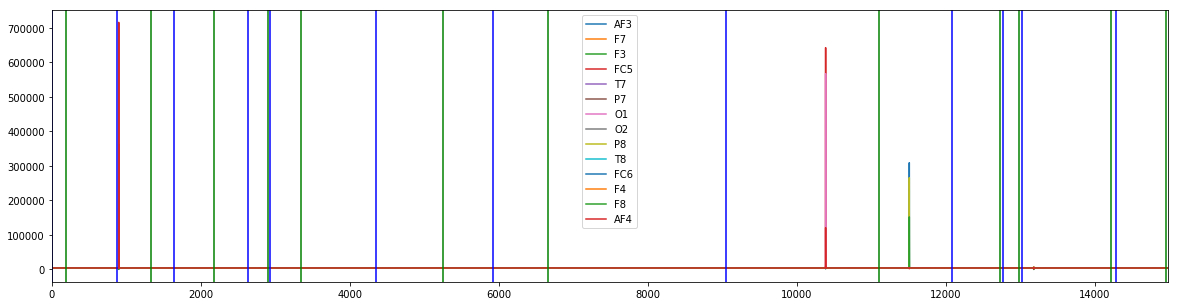

In [6]:
figsize(20,5)
eeg.drop('eyeDetection', axis=1).plot()
tmp = ''
for i, r in eeg.iterrows():
    if tmp != r['eyeDetection']:
        if r['eyeDetection'] == 0:
            axvline(x=i, color='b')
        else:
            axvline(x=i, color='g')
        tmp = r['eyeDetection']

## Fixed-size Sequence

In [7]:
train = eeg.iloc[:2000]
trainX = train.drop('eyeDetection', axis=1)
trainY = train['eyeDetection']
# testX = X.iloc[11000:]
# testY = y.iloc[11000:]

In [8]:
df = train.copy(deep=True)

In [9]:
input_cols = trainX.columns
output_cols = ['eyeDetection']
# Put your inputs into a single list
df['single_input_vector'] = df[input_cols].apply(tuple, axis=1).apply(list)
# Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
# Use .cumsum() to include previous row vectors in the current row list of vectors
df['cumulative_input_vectors'] = df.single_input_vector.cumsum()

In [10]:
df['output_vector'] = df[output_cols].apply(tuple, axis=1).apply(list)

In [11]:
# Pad your sequences so they are the same length
from keras.preprocessing.sequence import pad_sequences

max_sequence_length = df.cumulative_input_vectors.apply(len).max()
# Save it as a list   
padded_sequences = pad_sequences(df.cumulative_input_vectors.tolist(), max_sequence_length).tolist()
df['padded_input_vectors'] = pd.Series(padded_sequences).apply(np.asarray)

In [30]:
# Extract your training data
X_train_init = np.asarray(df.padded_input_vectors)
# Use hstack to and reshape to make the inputs a 3d vector
X_train = np.hstack(X_train_init).reshape(len(df),max_sequence_length,len(input_cols))
y_train = np.hstack(np.asarray(df.output_vector)).reshape(len(df),len(output_cols))

In [13]:
# Get your input dimensions
# Input length is the length for one input sequence (i.e. the number of rows for your sample)
# Input dim is the number of dimensions in one input vector (i.e. number of input columns)
input_length = X_train.shape[1]
input_dim = X_train.shape[2]
# Output dimensions is the shape of a single output vector
# In this case it's just 1, but it could be more
output_dim = len(y_train[0])

In [14]:
# Build the model
model = Sequential()

model.add(LSTM(50, input_dim = input_dim, input_length = input_length))
model.add(Dense(output_dim, activation='relu'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train,
              batch_size=7, nb_epoch=10,
              verbose = 1)

Epoch 1/10
2000/2000 [==============================] - 453s - loss: 7.9382 - acc: 0.5075   
Epoch 2/10
2000/2000 [==============================] - 439s - loss: 7.9382 - acc: 0.5075   
Epoch 3/10
2000/2000 [==============================] - 438s - loss: 7.9382 - acc: 0.5075   
Epoch 4/10
2000/2000 [==============================] - 438s - loss: 7.9382 - acc: 0.5075   
Epoch 5/10
2000/2000 [==============================] - 438s - loss: 7.9382 - acc: 0.5075   
Epoch 6/10
2000/2000 [==============================] - 438s - loss: 7.9382 - acc: 0.5075   
Epoch 7/10
2000/2000 [==============================] - 438s - loss: 7.9382 - acc: 0.5075   
Epoch 8/10
2000/2000 [==============================] - 437s - loss: 7.9382 - acc: 0.5075   
Epoch 9/10
2000/2000 [==============================] - 438s - loss: 7.9382 - acc: 0.5075   
Epoch 10/10
2000/2000 [==============================] - 431s - loss: 7.9382 - acc: 0.5075   


### What about arbitrary-sized sequences? 

In [123]:
train = eeg.iloc[:11000]
test = eeg.iloc[11000:]
trainX = train.drop('eyeDetection', axis=1)
trainY = train['eyeDetection']
testX = test.drop('eyeDetection', axis=1)
testY = test['eyeDetection']

In [124]:
df = train.copy(deep=True)

In [125]:
input_cols = trainX.columns
output_cols = ['eyeDetection']
# Put your inputs into a single list
df['single_input_vector'] = df[input_cols].apply(tuple, axis=1).apply(list)
# Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
df['output_vector'] = df[output_cols].apply(tuple, axis=1).apply(list)

In [126]:
max_sequence_length = df.single_input_vector.apply(len).max()
# Save it as a list   
padded_sequences = pad_sequences(df.single_input_vector.tolist(), max_sequence_length).tolist()
df['padded_input_vectors'] = pd.Series(padded_sequences).apply(np.asarray)

In [127]:
# Extract your training data
X_train_init = np.asarray(df.padded_input_vectors)
# Use hstack to and reshape to make the inputs a 3d vector
X_train = np.hstack(X_train_init).reshape(len(df),max_sequence_length,len(input_cols))
y_train = np.hstack(np.asarray(df.output_vector)).reshape(len(df),len(output_cols))

In [128]:
# Get your input dimensions
# Input length is the length for one input sequence (i.e. the number of rows for your sample)
# Input dim is the number of dimensions in one input vector (i.e. number of input columns)
input_length = X_train.shape[1]
input_dim = X_train.shape[2]
# Output dimensions is the shape of a single output vector
# In this case it's just 1, but it could be more
output_dim = 1

In [129]:
# Build the model
model = Sequential()

model.add(LSTM(56, input_shape=(None, input_dim), return_sequences=True))
model.add(LSTM(56, return_sequences=True))
model.add(LSTM(56))

model.add(Dense(output_dim, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [130]:
history = model.fit(X_train, y_train, nb_epoch=500,
              verbose = 1)

Epoch 1/500
11000/11000 [==============================] - 4s - loss: 0.6934 - acc: 0.5031     
Epoch 2/500
11000/11000 [==============================] - 3s - loss: 0.6933 - acc: 0.5000     
Epoch 3/500
11000/11000 [==============================] - 3s - loss: 0.6933 - acc: 0.5045     
Epoch 4/500
11000/11000 [==============================] - 3s - loss: 0.6932 - acc: 0.5018     
Epoch 5/500
11000/11000 [==============================] - 4s - loss: 0.6932 - acc: 0.5049     
Epoch 6/500
11000/11000 [==============================] - 4s - loss: 0.6931 - acc: 0.5027     
Epoch 7/500
11000/11000 [==============================] - 4s - loss: 0.6932 - acc: 0.5060     
Epoch 8/500
11000/11000 [==============================] - 3s - loss: 0.6931 - acc: 0.5060     
Epoch 9/500
11000/11000 [==============================] - 3s - loss: 0.6932 - acc: 0.5007     
Epoch 10/500
11000/11000 [==============================] - 4s - loss: 0.6931 - acc: 0.5060     
Epoch 11/500
11000/11000 [=============

11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 86/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5005     
Epoch 87/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 88/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 89/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 90/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 91/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 92/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 93/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 94/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 95/500
11000/11000 [=================

11000/11000 [==============================] - 4s - loss: 0.6930 - acc: 0.5060     
Epoch 169/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 170/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 171/500
11000/11000 [==============================] - 4s - loss: 0.6930 - acc: 0.5060     
Epoch 172/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 173/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 174/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 175/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 176/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 177/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 178/500
11000/11000 [=======

11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 252/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 253/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 254/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 255/500
11000/11000 [==============================] - 4s - loss: 0.6930 - acc: 0.5060     
Epoch 256/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 257/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 258/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 259/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 260/500
11000/11000 [==============================] - 3s - loss: 0.6930 - acc: 0.5060     
Epoch 261/500
11000/11000 [=======

KeyboardInterrupt: 

Sadly, using RNNs isn't as straightforward as using CNNs.

## Takeaways

1. RNNs are great for modeling with sequential data
2. LSTM cells, and other newer neural units such as GRU, aim to solve the long term dependencies problem.
3. RNNs can be used for classification, regression, and even generative applications.

## References:
1. [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness)
2. [Understanding LSTMs](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
3. [LSTM Explained](https://apaszke.github.io/lstm-explained.html)